## CSSE COVID-19 Dataset

JHU CSSE에서는 아래 github repository를 통해 covid-19 현황을 매일 업데이트하고 있습니다.

- https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

위의 데이터는 아래의 dashboard를 통해 시각화되어 공개되고 있기도 합니다.
- https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6



In [0]:
data_file = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

인터넷에 있는 csv파일도 pd.read_csv파일을 이용해 불러올 수 있습니다. 실시간으로 업데이트되는 데이터를 다룰 때에는 인터넷이나 DB에 접속하여 데이터를 가져와야 할 것 입니다.

In [0]:
import pandas as pd
data = pd.read_csv(data_file)

이 데이터는 주, 나라, 위도, 경도에 대한 정보와 각 날짜별 확진자 숫자를 제공하고 있습니다. 우리나라는 143번째 줄(row)에 위치하는 것을 알 수 있습니다.

In [3]:
data[141:150]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
141,NaN,Kazakhstan,48.0196,66.9237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,9,10,33,35,44,49,53,60,62,72,81,111,150,228,284,302
142,NaN,Kenya,-0.0236,37.9062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,3,3,7,7,7,15,16,25,28,31,31,38,42,50
143,NaN,"Korea, South",36.0000,128.0000,1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,833,977,1261,1766,2337,3150,3736,4335,5186,5621,6088,6593,7041,7314,7478,7513,7755,7869,7979,8086,8162,8236,8320,8413,8565,8652,8799,8961,8961,9037,9137,9241,9332,9478,9583,9661
144,NaN,Kuwait,29.5000,47.7500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11,26,43,45,45,45,56,56,56,58,58,61,64,64,69,72,80,80,104,112,123,130,142,148,159,176,188,189,191,195,208,225,235,255,266
145,NaN,Kyrgyzstan,41.2044,74.7661,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,6,14,14,16,42,44,44,58,58,84,94
146,NaN,Latvia,56.8796,24.6032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,6,8,10,10,17,26,30,34,49,71,86,111,124,139,180,197,221,244,280,305,347,376
147,NaN,Lebanon,33.8547,35.8623,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,4,10,13,13,13,16,22,22,32,32,41,61,61,77,93,110,110,120,133,157,163,187,248,267,318,333,368,391,412,438,446
148,NaN,Liberia,6.4281,-9.4295,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,3,3,3,3,3,3,3,3,3,3
149,NaN,Liechtenstein,47.1400,9.5500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,4,4,4,7,28,28,28,37,37,51,51,51,56,56,56,56,62


In [4]:
inputs, outputs = data.iloc[:,[1,2,3]], data.iloc[:,-1]
inputs[:12]

,Country/Region,Lat,Long
0,Afghanistan,33.0000,65.0000
1,Albania,41.1533,20.1683
2,Algeria,28.0339,1.6596
3,Andorra,42.5063,1.5218
4,Angola,-11.2027,17.8739
5,Antigua and Barbuda,17.0608,-61.7964
6,Argentina,-38.4161,-63.6167
7,Armenia,40.0691,45.0382
8,Australia,-35.4735,149.0124
9,Australia,-33.8688,151.2093


In [5]:
outputs[:12]

0      170
1      223
2      584
3      370
4        7
5        7
6      820
7      482
8       78
9     2032
10      15
11     689
Name: 3/30/20, dtype: int64

get_dummies에 대해 살펴봅시다. dummy_na가 True인 경우와 False인 경우를 알아봅시다. 

In [6]:
input5 = inputs[:5]
input5_d = pd.get_dummies(input5[:5], dummy_na=True)
input5_d

,Lat,Long,Country/Region_Afghanistan,Country/Region_Albania,Country/Region_Algeria,Country/Region_Andorra,Country/Region_Angola,Country/Region_nan
0,33.0000,65.0000,1,0,0,0,0,0
1,41.1533,20.1683,0,1,0,0,0,0
2,28.0339,1.6596,0,0,1,0,0,0
3,42.5063,1.5218,0,0,0,1,0,0
4,-11.2027,17.8739,0,0,0,0,1,0


In [0]:
import torch
from matplotlib import pyplot as plt

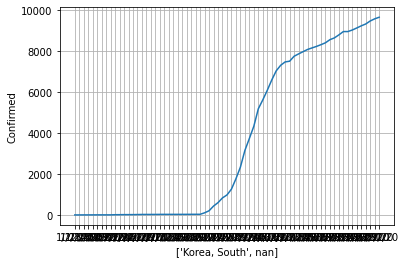

In [8]:
n = 143 #62: hubei
fig=plt.figure()
ax=fig.gca()
ax.plot(data.iloc[n,4:])
ax.set_xlabel([data.iloc[n,1],data.iloc[n,0]])
ax.set_ylabel('Confirmed')
ax.grid('both')

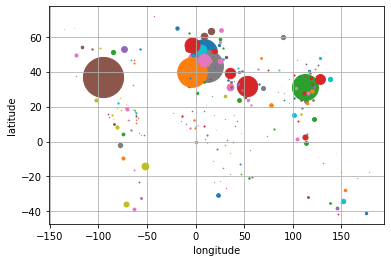

In [11]:
fig=plt.figure() 
ax=fig.gca()
for n in range(len(inputs)):
  ax.scatter(inputs.iloc[n,2],inputs.iloc[n,1],s=outputs.iloc[n]/100)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.grid('both')

Text(0.5, 0, 'longitude')

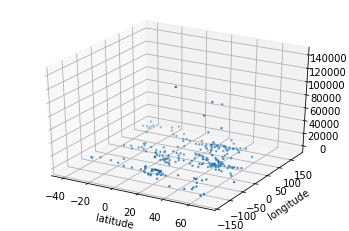

In [0]:
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter3D(inputs.iloc[:,1],inputs.iloc[:,2],outputs.iloc[:],s=2)
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')

Text(0.5, 0, 'longitude')

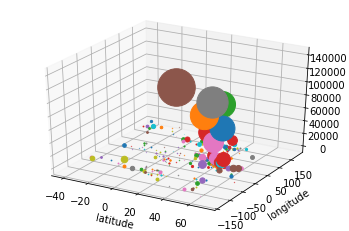

In [0]:
fig=plt.figure()
ax=fig.gca(projection='3d')
for n in range(len(inputs)):
  ax.scatter3D(inputs.iloc[n,1],inputs.iloc[n,2],outputs.iloc[n],s=outputs.iloc[n]/100)
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')